In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt 

In [2]:
coughvid_metadata_path = '/home/sameer/Cough-Sense/coughvid_data/metadata_compiled.csv'


In [10]:
df_coughvid = pd.read_csv(coughvid_metadata_path)
df_coughvid.head()

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print("The total number of coughs are " + str(len(df_coughvid)))

The total number of coughs are 27550


## Filter Out Bad Cough Scores

In [28]:
# import image module 
from IPython.display import Image 
  
# get the image 
Image(url="img/ROC_cough_score.png", width=500, height=300) 

In [35]:
cough_score_threshold = 0.8 # Value said in paper where only 4.6% of coughs would be non-coughs
filtered_df = df_coughvid.loc[df_coughvid['cough_detected'] > cough_score_threshold]

## Identify Covid Count

In [36]:
diagnosis_1 = filtered_df['diagnosis_1']
diagnosis_2 = filtered_df['diagnosis_2']
diagnosis_3 = filtered_df['diagnosis_3']
diagnosis_4 = filtered_df['diagnosis_4']

In [37]:
covid_diagnosis_1 = diagnosis_1 == 'COVID-19'
covid_diagnosis_2 = diagnosis_2 == 'COVID-19'
covid_diagnosis_3 = diagnosis_3 == 'COVID-19'
covid_diagnosis_4 = diagnosis_4 == 'COVID-19'

In [38]:
physician_covid_count = sum(covid_diagnosis_1.tolist()) + sum(covid_diagnosis_2.tolist()) + sum(covid_diagnosis_3.tolist()) + sum(covid_diagnosis_4.tolist())
print("The total number of diagnosed COVID-19 is " + str(physician_covid_count))

The total number of diagnosed COVID-19 is 649


In [45]:
self_reported_covid_count = filtered_df['status'] == 'COVID-19'
print("The total number of self-reported COVID-19 is " + str(sum(self_reported_covid_count.tolist())))

The total number of self-reported COVID-19 is 699


Physicians underreported COVID-19 maybe
Should calculate a percentage of how many times where covid was self reported that physicians also said covid.
But I also can't imagine physicians can diagnose covid from coughs so just trust the self-reported.

## Identify Healthy Count

In [43]:
self_reported_healthy_count = filtered_df['status'] == 'healthy'
print("The total number of self-reported healthy is " + str(sum(self_reported_healthy_count.tolist())))

The total number of self-reported healthy is 8298


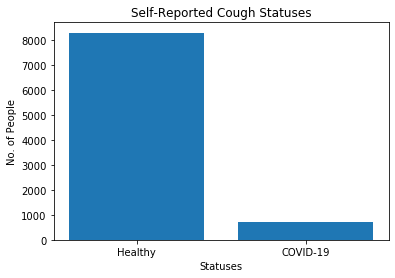

In [44]:
plt.bar(['Healthy', 'COVID-19'], [sum(self_reported_healthy_count.tolist()), sum(self_reported_covid_count.tolist())])
plt.xlabel("Statuses")
plt.ylabel("No. of People")
plt.title("Self-Reported Cough Statuses")
plt.show()

Clear class imbalance, cross-reference with TB data for how to deal with imbalance.
In total there would be 8298 'Neither' cases and 699 'Viral' cases.